In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data=pd.read_excel("bisiklet_fiyatlari.xlsx")

In [3]:
x=data[["BisikletOzellik1","BisikletOzellik2"]].values

In [4]:
y=data["Fiyat"].values

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)

In [6]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [7]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [8]:
model=Sequential()

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [9]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 0s 1ms/step - loss: 795837.2500
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795702.1875
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 795572.1875
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795435.5000
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 795287.2500
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 795113.8125
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 794906.5625
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 794660.7500
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 794366.8750
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 794013.0625
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 793590.7500
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

21/21 [==============================] - 0s 1ms/step - loss: 32201.7500
Epoch 97/250
21/21 [==============================] - 0s 2ms/step - loss: 25024.1934
Epoch 98/250
21/21 [==============================] - 0s 1ms/step - loss: 19132.3281
Epoch 99/250
21/21 [==============================] - 0s 1ms/step - loss: 14460.6982
Epoch 100/250
21/21 [==============================] - 0s 1ms/step - loss: 11064.6133
Epoch 101/250
21/21 [==============================] - 0s 1ms/step - loss: 8984.7178
Epoch 102/250
21/21 [==============================] - 0s 1ms/step - loss: 8034.0244
Epoch 103/250
21/21 [==============================] - 0s 1ms/step - loss: 7745.0596
Epoch 104/250
21/21 [==============================] - 0s 952us/step - loss: 7628.1147
Epoch 105/250
21/21 [==============================] - 0s 952us/step - loss: 7536.2075
Epoch 106/250
21/21 [==============================] - 0s 1ms/step - loss: 7437.6240
Epoch 107/250
21/21 [==============================] - 0s 999us/step - lo

21/21 [==============================] - 0s 1ms/step - loss: 731.2428
Epoch 193/250
21/21 [==============================] - 0s 1ms/step - loss: 697.0908
Epoch 194/250
21/21 [==============================] - 0s 1ms/step - loss: 660.3300
Epoch 195/250
21/21 [==============================] - 0s 999us/step - loss: 622.5222
Epoch 196/250
21/21 [==============================] - 0s 999us/step - loss: 595.2260
Epoch 197/250
21/21 [==============================] - 0s 1ms/step - loss: 558.4653
Epoch 198/250
21/21 [==============================] - 0s 1ms/step - loss: 530.2589
Epoch 199/250
21/21 [==============================] - 0s 952us/step - loss: 496.8662
Epoch 200/250
21/21 [==============================] - 0s 1ms/step - loss: 469.3655
Epoch 201/250
21/21 [==============================] - 0s 1ms/step - loss: 437.9839
Epoch 202/250
21/21 [==============================] - 0s 1ms/step - loss: 408.4447
Epoch 203/250
21/21 [==============================] - 0s 1ms/step - loss: 379.2112


In [10]:
model.history.history.keys()##dictionary çeviriyo

dict_keys(['loss'])

In [11]:
loss=model.history.history["loss"]

In [12]:
import seaborn as sbn

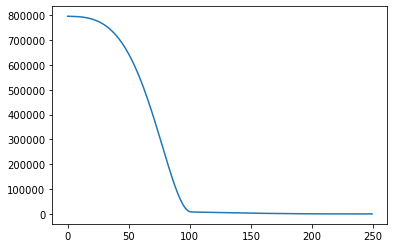

In [13]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [14]:
model.evaluate(x_train,y_train,verbose=0)

74.35836791992188

In [15]:
trainLoss=model.evaluate(x_train,y_train,verbose=0)
testLoss=model.evaluate(x_test,y_test,verbose=0)

In [16]:
trainLoss

74.35836791992188

In [17]:
testLoss

73.80792236328125

In [18]:
testTahmin=model.predict(x_test)

In [19]:
dataFrame=pd.DataFrame(y_test,columns=["gercek deger"])

In [20]:
dataFrame["tahmin edilen deger"]=testTahmin

In [21]:
dataFrame

,gercek deger,tahmin edilen deger
0,1081.652164,1078.623169
1,622.675990,624.993774
2,889.356810,877.047607
3,902.826733,895.464294
4,897.662404,900.772949
...,...,...
325,1028.438035,1014.380310
326,789.934950,792.074463
327,758.490486,766.956970
328,1172.871659,1168.260010


In [22]:
dataFrame

,gercek deger,tahmin edilen deger
0,1081.652164,1078.623169
1,622.675990,624.993774
2,889.356810,877.047607
3,902.826733,895.464294
4,897.662404,900.772949
...,...,...
325,1028.438035,1014.380310
326,789.934950,792.074463
327,758.490486,766.956970
328,1172.871659,1168.260010


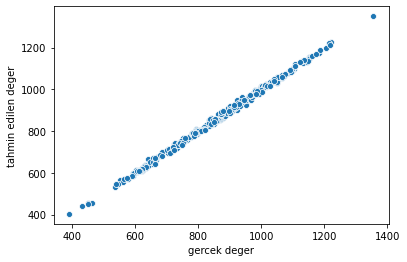

In [23]:
sbn.scatterplot(x="gercek deger",y="tahmin edilen deger",data=dataFrame)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mean_absolute_error(dataFrame["gercek deger"],dataFrame["tahmin edilen deger"])

6.871675460965907

In [26]:
mean_squared_error(dataFrame["gercek deger"],dataFrame["tahmin edilen deger"])

73.80791219434825

In [27]:
data.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [28]:
yeniBisikletOzellikleri=[[1750,1750]]

In [29]:
yeniBisikletOzellikleri=scaler.transform(yeniBisikletOzellikleri)

In [30]:
model.predict(yeniBisikletOzellikleri)

array([[875.31714]], dtype=float32)

In [31]:
from tensorflow.keras.models import load_model

In [32]:
model.save("bisiklet_modeli.h5")

In [33]:
sonradanCagrilanModel=load_model("bisiklet_modeli.h5")

In [34]:
sonradanCagrilanModel.predict(yeniBisikletOzellikleri)

array([[875.31714]], dtype=float32)